# DonorsChoose Prediction Project

## 1. Introduction

Founded in 2000 by a high school teacher in the Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount.

DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.

Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
- How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible;
- How to increase the consistency of project vetting across different volunteers to improve the experience for teachers;
- How to focus volunteer time on the applications that need the most assistance.

The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.

With an algorithm to pre-screen applications, DonorsChoose.org can auto-approve some applications quickly so that volunteers can spend their time on more nuanced and detailed project vetting processes, including doing more to help teachers develop projects that qualify for specific funding opportunities.

Your machine learning algorithm can help more teachers get funded more quickly, and with less cost to DonorsChoose.org, allowing them to channel even more funding directly to classrooms across the country.

## 2. Problem

The question to be answered is: how to optimize project selection through an intelligent pre-selection? With this, the volunteers can spend their time on more nuanced and detailed project vetting processes, including doing more to help teachers develop projects that qualify for specific funding opportunities. It is about how to optimize resources and time in a business. 

## 3. Solution

It is a supervised learning problem. The dataset is composed of categorical features and is unbalanced. So, we need to use machine learning algorithms that can deal with categorical features, and we also need to stratify our dataset split, to keep the dataset proportion.

## 4. Dataset

### File descriptions
- train.csv - the training set
- test.csv - the test set
- resources.csv - resources requested by each proposal; joins with test.csv and train.csv on id
- sample_submission.csv - a sample submission file in the correct format

### Data fields
`test.csv` and `train.csv`:
- id - unique id of the project application
- teacher_id - id of the teacher submitting the application
- teacher_prefix - title of the teacher's name (Ms., Mr., etc.)
- school_state - US state of the teacher's school
- project_submitted_datetime - application submission timestamp
- project_grade_category - school grade levels (PreK-2, 3-5, 6-8, and 9-12)
- project_subject_categories - category of the project (e.g., "Music & The Arts")
- project_subject_subcategories - sub-category of the project (e.g., "Visual Arts")
- project_title - title of the project
- project_essay_1 - first essay*
- project_essay_2 - second essay*
- project_essay_3 - third essay*
- project_essay_4 - fourth essay*
- project_resource_summary - summary of the resources needed for the project
- teacher_number_of_previously_posted_projects - number of previously posted applications by the submitting teacher
- project_is_approved - whether DonorsChoose proposal was accepted (0="rejected", 1="accepted"); `train.csv` only
* Note: Prior to May 17, 2016, the prompts for the essays were as follows:
- project_essay_1: "Introduce us to your classroom"
- project_essay_2: "Tell us more about your students"
- project_essay_3: "Describe how your students will use the materials you're requesting"
- project_essay_4: "Close by sharing why your project will make a difference"

Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:
- project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."
- project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"

For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.

`resources.csv`:
Proposals also include resources requested. Each project may include multiple requested resources. Each row in resources.csv corresponds to a resource, so multiple rows may tie to the same project by id.
- id - unique id of the project application; joins with test.csv. and train.csv on id
- description - description of the resource requested
- quantity - quantity of resource requested
- price - price of resource requested

### Notes on the Essay Data
Prior to May 17, 2016, the prompts for the essays were as follows:
- project_essay_1: "Introduce us to your classroom"
- project_essay_2: "Tell us more about your students"
- project_essay_3: "Describe how your students will use the materials you're requesting"
- project_essay_4: "Close by sharing why your project will make a difference"

Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:
- project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."
- project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"

For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data plot and processing
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['resources.csv', 'train.csv', 'test.csv', 'sample_submission.csv']


In [2]:
# Importing data
sample = pd.read_csv("../input/sample_submission.csv")
resources = pd.read_csv("../input/resources.csv")
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
sample.head()

,id,project_is_approved
0,p233245,0.847682
1,p096795,0.847682
2,p236235,0.847682
3,p233680,0.847682
4,p171879,0.847682


In [9]:
resources.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [10]:
train.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


#### Dataset distribution
Here we verify the distribution of the dataset. We can see that the training set is unbalanced. So we need to take this into account in our analysis.

In [3]:
approval_percentage = 100* train[train["project_is_approved"] == 1].shape[0]/train.shape[0]
nonapproval_percentage = 100 * train[train["project_is_approved"] == 0].shape[0]/train.shape[0]

print("Total of samples: ", train.shape[0])
print("Non-Approval: {:.3f}%".format(nonapproval_percentage))
print("Aproval: {:.3f}%".format(approval_percentage))

Total of samples:  182080
Non-Approval: 15.232%
Aproval: 84.768%


## 5. Data Analysis

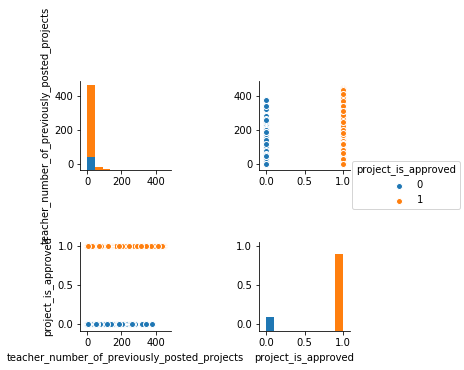

In [4]:
sns.pairplot(train.iloc[1000:,:], 
             hue = 'project_is_approved')
plt.show()

### Total Amount

[TODO]

### Grade, Subject Categories, Subject Sub Categories
[TODO]

### Bag of Words, Sentimental Analys
[TODO]

### Teacher Rating
Here we discovered 2-3 groups of teachers: 
- Those that submitted a lot of projects and have an average
- And those that submitted 1-2 projects that were approved and don't have any previously posted projects (or posted 1-2 projects before)

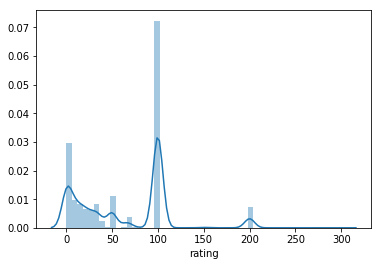

In [5]:
by_teacher = train.groupby('teacher_id').sum()
#by_teacher['rating'] = 100 * by_teacher['project_is_approved'] / by_teacher['teacher_number_of_previously_posted_projects']
by_teacher['rating'] = np.where( by_teacher['teacher_number_of_previously_posted_projects'] != 0, 
                                100 * by_teacher['project_is_approved'] / by_teacher['teacher_number_of_previously_posted_projects'], 
                                100 * by_teacher['project_is_approved'])
# by_teacher.sort_values('rating', ascending=True).head()
# by_teacher.sort_values('rating', ascending=False).head()
sns.distplot(by_teacher['rating'], bins = 50)

### Prefix Rating

Rating by teacher prefix doesn't have mush differences between types.

In [6]:
train['teacher_prefix'].unique()

array(['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.', nan], dtype=object)

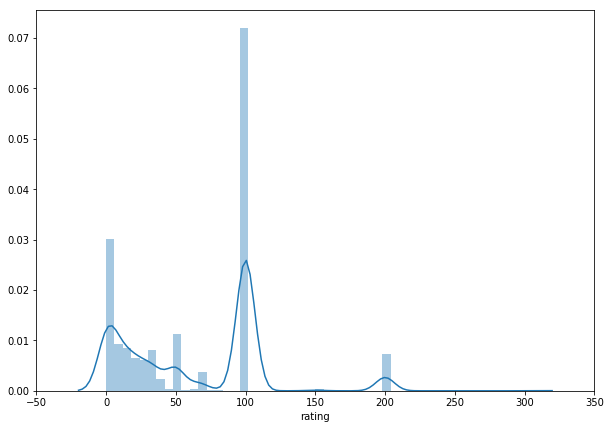

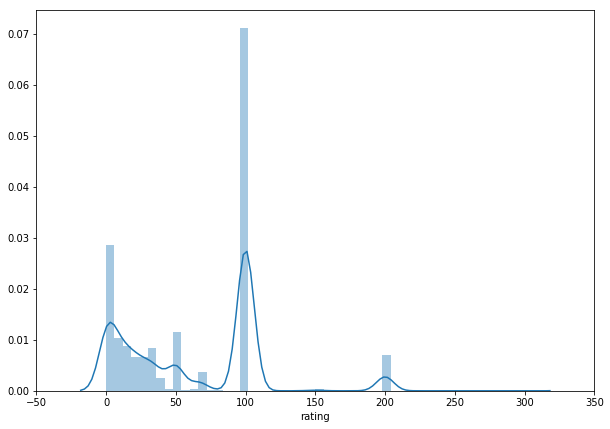

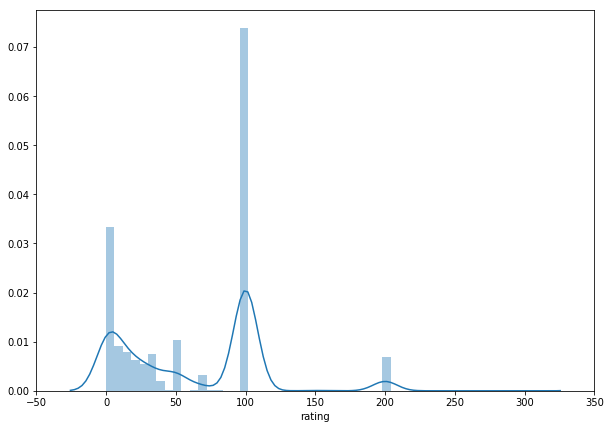

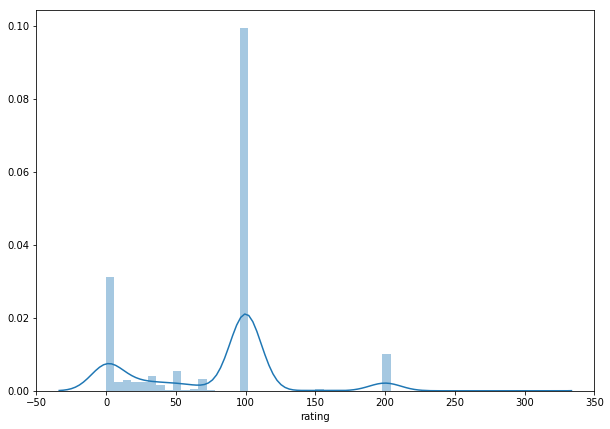

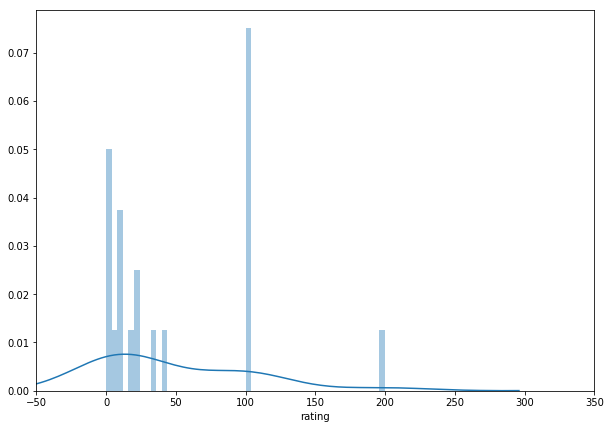

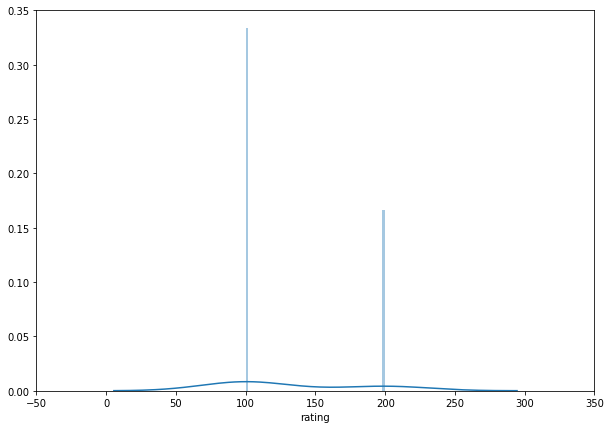

In [7]:
# For all types but NaN
for i in ['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.']:
    by_teacher = train[train['teacher_prefix'] == i].groupby('teacher_id').sum()
    #by_teacher['rating'] = 100 * by_teacher['project_is_approved'] / by_teacher['teacher_number_of_previously_posted_projects']
    by_teacher['rating'] = np.where( by_teacher['teacher_number_of_previously_posted_projects'] != 0, 
                                    100 * by_teacher['project_is_approved'] / by_teacher['teacher_number_of_previously_posted_projects'], 
                                    100 * by_teacher['project_is_approved'])
    plt.figure(figsize = (10,7))
    plt.xlim(-50, 350)
    sns.distplot(by_teacher['rating'], bins = 50)

# For NaN
by_teacher = train[train['teacher_prefix'].isna()].groupby('teacher_id').sum()
#by_teacher['rating'] = 100 * by_teacher['project_is_approved'] / by_teacher['teacher_number_of_previously_posted_projects']
by_teacher['rating'] = np.where( by_teacher['teacher_number_of_previously_posted_projects'] != 0, 
                                100 * by_teacher['project_is_approved'] / by_teacher['teacher_number_of_previously_posted_projects'], 
                                100 * by_teacher['project_is_approved'])
plt.figure(figsize = (10,7))
plt.xlim(-50, 350)
sns.distplot(by_teacher['rating'], bins = 50)

### Put total amount together train data, replace teacher_id by teacher_rating, replace title and essays by sentimental, and do one-hot encoding on state and categories

In [11]:
resources['amount'] = resources['quantity']*resources['price']
amount_df = resources.groupby('id')['amount'].agg('sum').sort_values(ascending=False).reset_index()

resource_amount_map = {}
for i, row in amount_df.iterrows():
    resource_amount_map[row['id']] = row['amount']

train.insert(4,'total_amount',train['id'].map(resource_amount_map))
train.tail(3)

,id,teacher_id,teacher_prefix,school_state,total_amount,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
182077,p074761,3429d29ecba4a37ac5bd69ded4aab341,Mrs.,AZ,721.07,2017-02-09 15:42:43,Grades 6-8,Math & Science,"Applied Sciences, Environmental Science",Sustainable Classroom,I teach science to eighth graders at a suburba...,"With this project, students will be able to ma...",NaN,NaN,"My students need a vinyl machine, button maker...",48,0
182078,p136737,497ba7027394d6490d2d2b34af2db5fd,Mrs.,FL,237.92,2016-12-28 14:20:07,Grades PreK-2,Literacy & Language,Literacy,Can I go to the library?,I work with a group of wonderful second grade ...,Have you ever went to the library to find a go...,NaN,NaN,My students need 3 shelf organizers to have a ...,29,1
182079,p190772,337bc63eccf6f6ee26e727a1f18b80f4,Ms.,TX,338.00,2016-05-15 20:25:14,Grades 3-5,Literacy & Language,Literacy,Reader Leaders!,Balanced literacy was a mystery to me until a ...,"At the beginning of the school year, the readi...",My students will be able to listen to books re...,Donations to this project will help my student...,My students need a literacy listening center w...,1,1


In [12]:
test.insert(4,'total_amount',train['id'].map(resource_amount_map))
test.tail(3)

,id,teacher_id,teacher_prefix,school_state,total_amount,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects
78032,p210728,692376a473aaf753890e329081b5787c,Mrs.,CA,1203.30,2017-04-17 17:53:12,Grades 6-8,Literacy & Language,"Literacy, Literature & Writing",Everyday Authors Among Us,My 6th grade students are a lively bunch of in...,"Every year, my 6th grade students write and pu...",NaN,NaN,My students need a variety of materials to use...,4
78033,p060531,0fcaec76e9ea1730e81f2ca8eae5891b,Mrs.,OR,785.79,2017-04-19 12:11:59,Grades 3-5,"Warmth, Care & Hunger","Warmth, Care & Hunger",Coat Lockers for Our Classroom!,In our classroom students celebrate their indi...,"At this time, my students place their personal...",NaN,NaN,"My students need coat lockers, so they have a ...",9
78034,p087783,d3fd1b7b0efff1eddbd3fbfe4c00711e,Mrs.,IN,312.25,2017-04-27 19:50:35,Grades 3-5,"Literacy & Language, Math & Science","Literacy, Mathematics",A Coffee Shop Classroom,I am a teacher in a Title 1 K-5 elementary sch...,I am gradually switching my classroom from tra...,NaN,NaN,My students need flexible seating arrangements...,0
